<a href="https://colab.research.google.com/github/Basakrana/bean/blob/main/Supervised_Learning_Classification_Rana_Basak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

classification model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/dry_bean.csv')

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
df.duplicated().sum()

np.int64(68)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

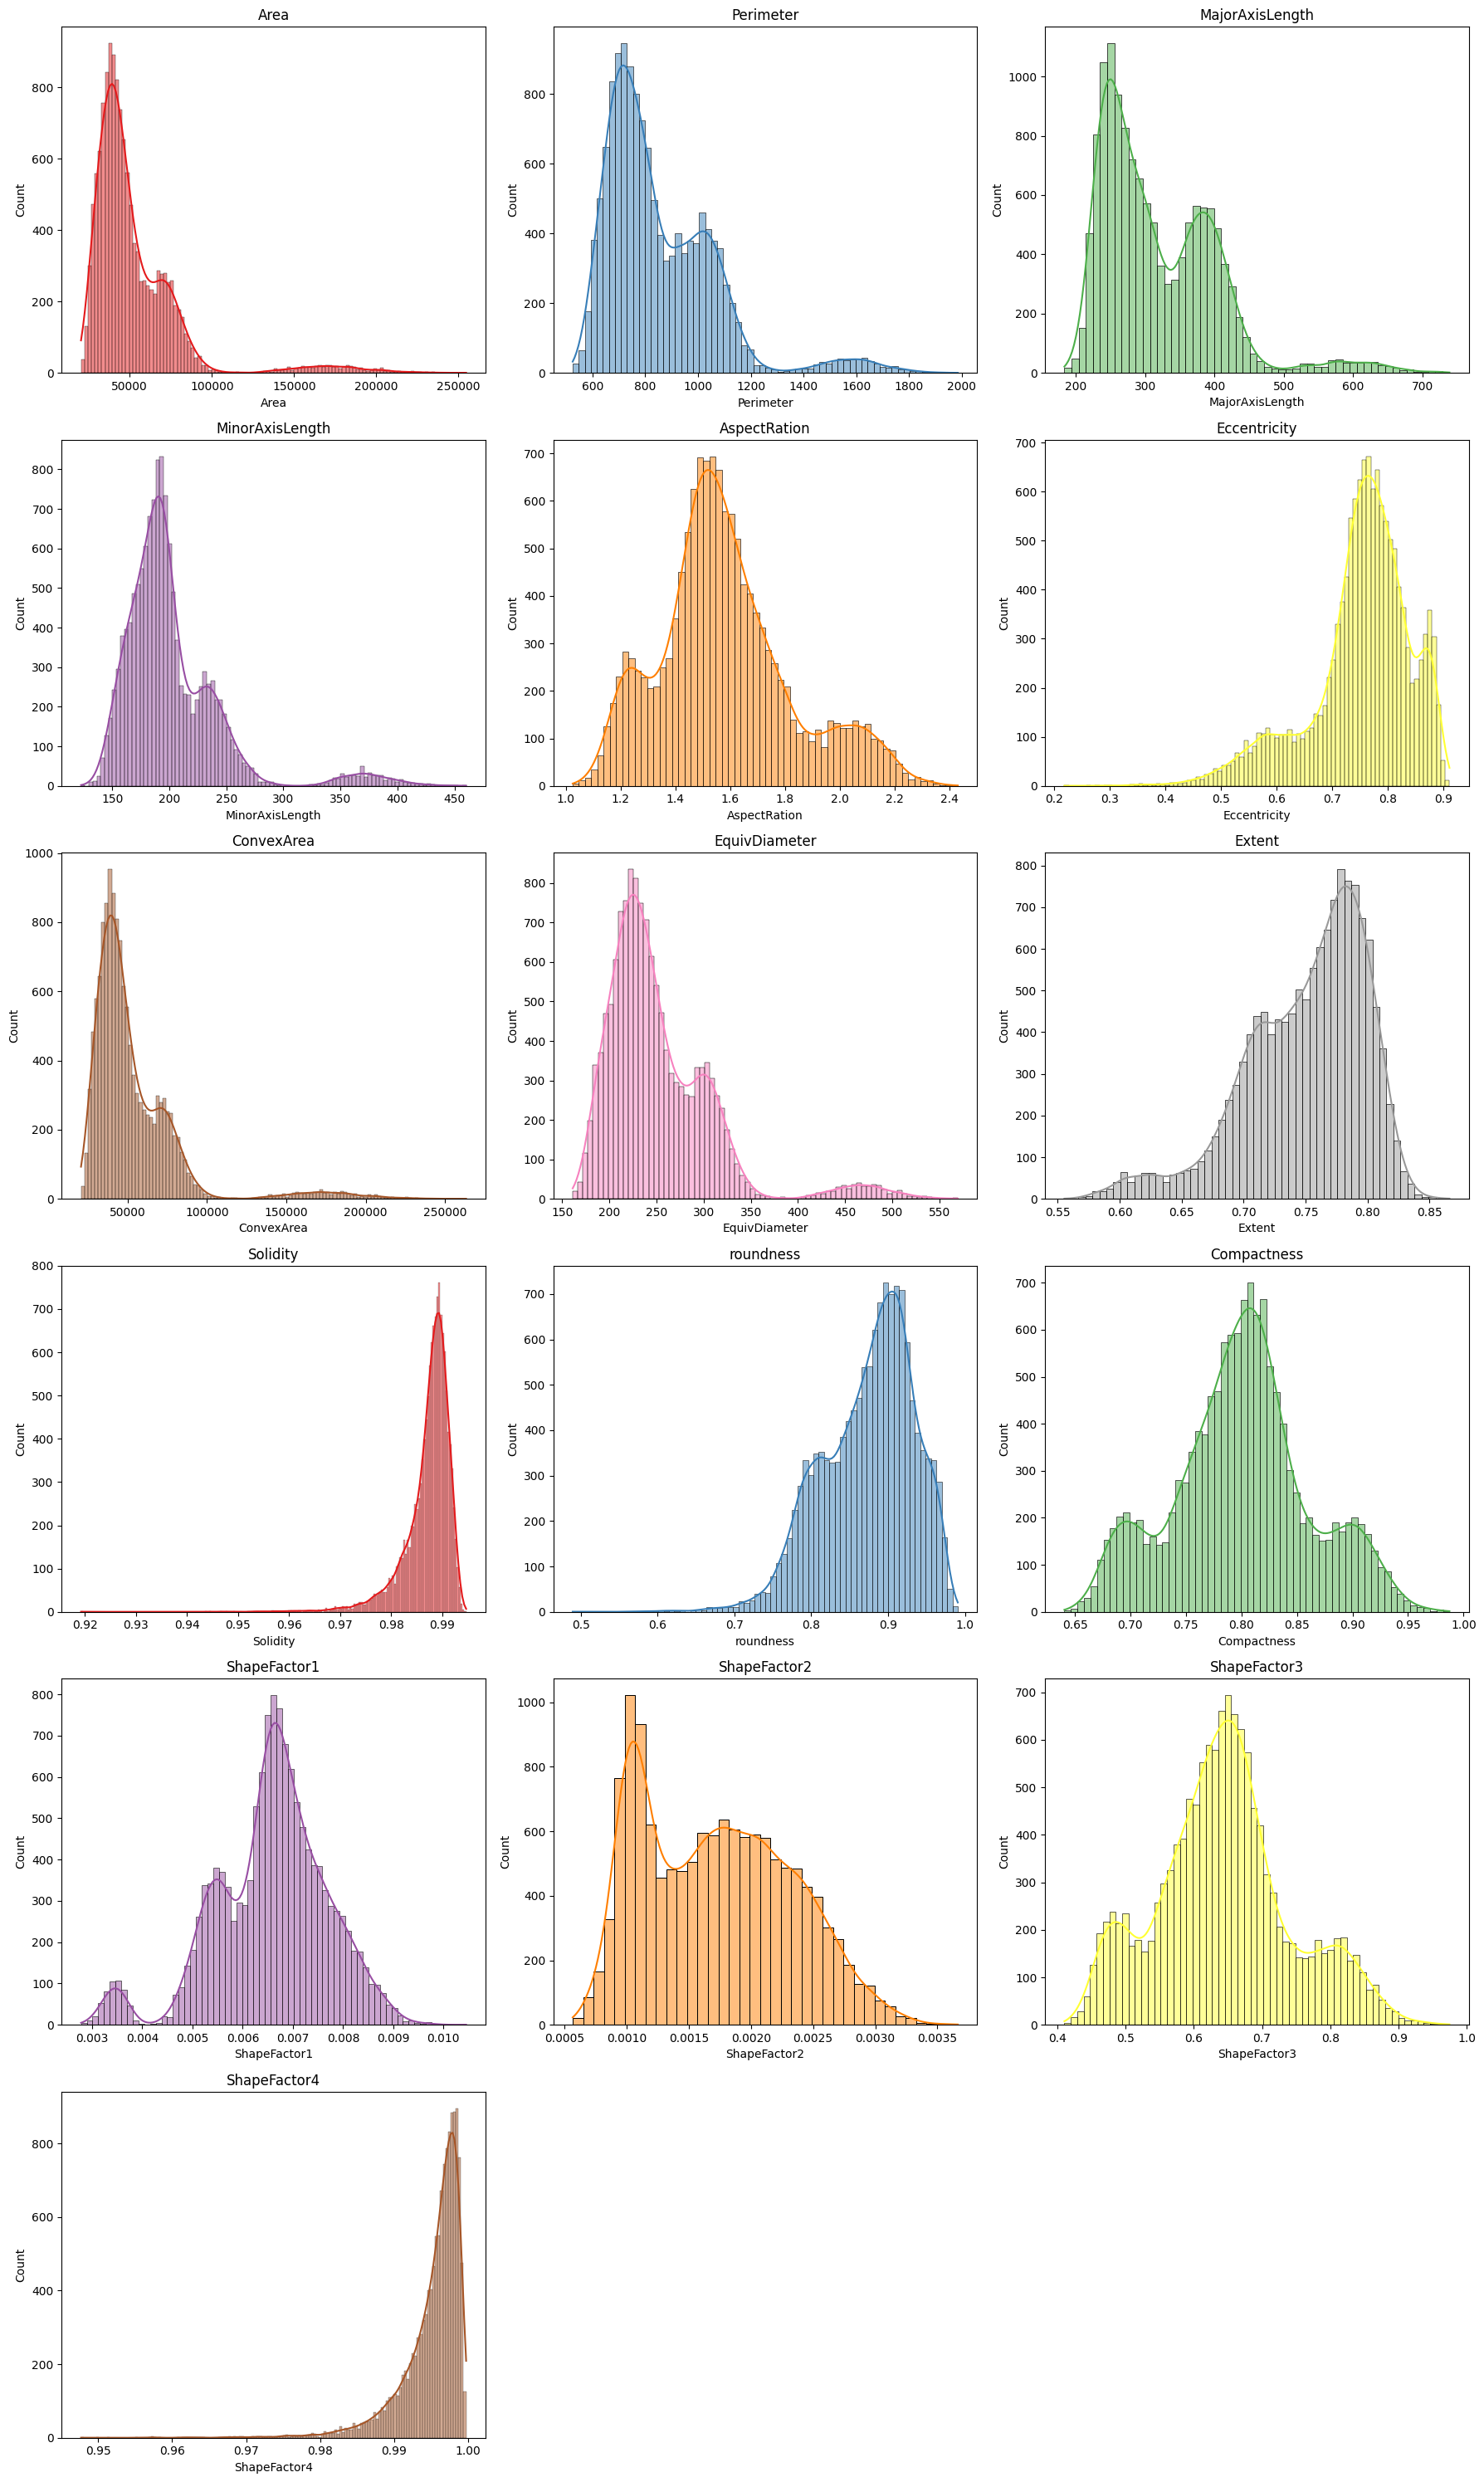

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include="number").columns

# Set rows and columns
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

# Choose a color palette
palette = sns.color_palette("Set1", len(num_cols))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color=palette[i])
    axes[i].set_title(col, fontsize=12)

# Remove unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
class_mapping = {
    "DERMASON": 0,
    "SIRA": 1,
    "SEKER": 2,
    "HOROZ": 3,
    "CALI": 4,
    "BARBUNYA": 5,
    "BOMBAY": 6
}
# Assuming your target column is 'Class'
df["Class_encoded"] = df["Class"].map(class_mapping)


In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_encoded
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,2
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,2
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,2
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,2
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,2


In [ ]:
df['Class'].value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1860
CALI,1630
BARBUNYA,1322
BOMBAY,522


In [ ]:
num = df.select_dtypes(include = 'number')

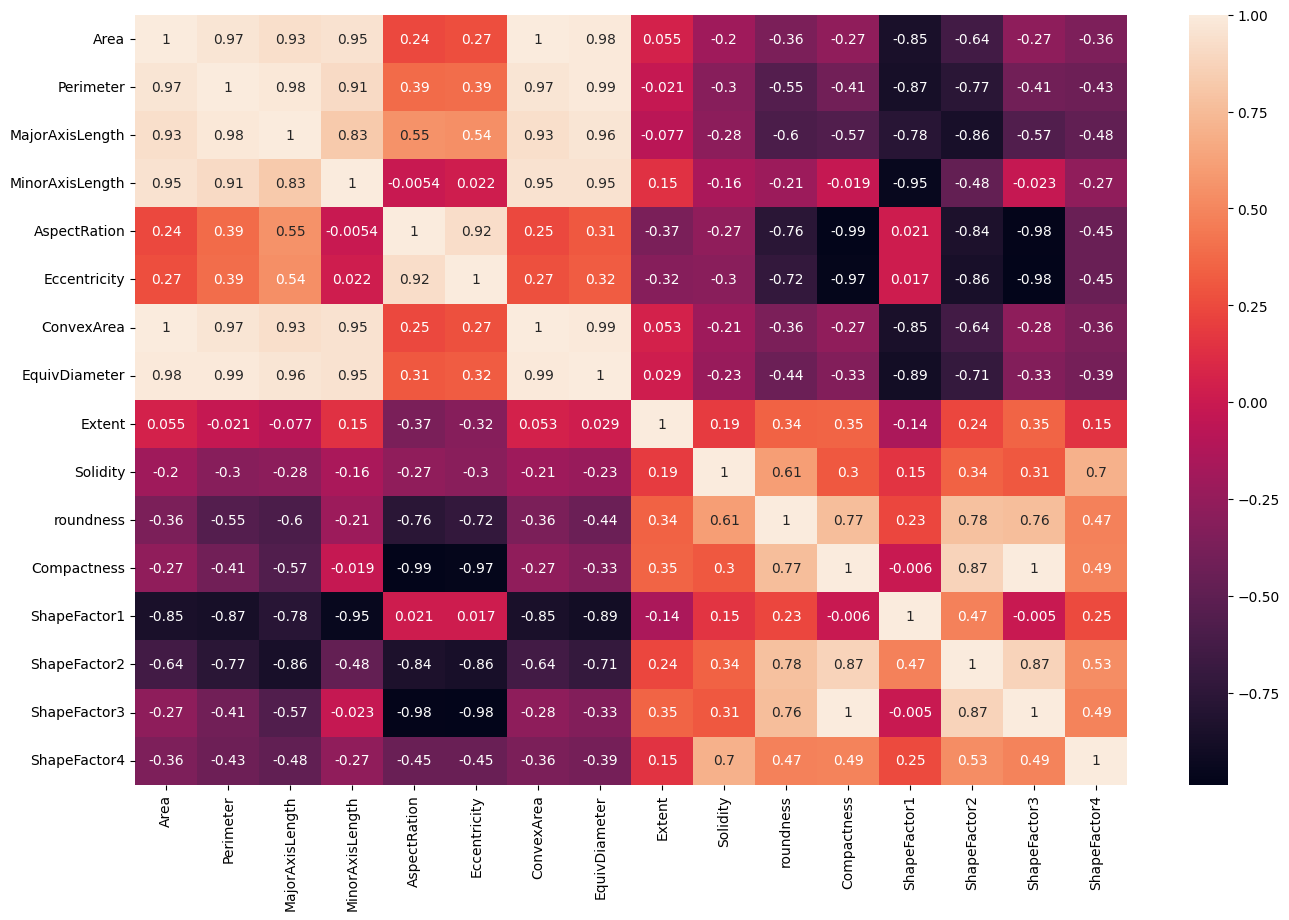

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(num.corr(),annot = True)
plt.show()

In [ ]:
plt.figure(figsize = (20,20))
sns.pairplot(df, hue="Class", diag_kind="kde")
plt.show()

FILE IS NOT UPLOADED IN ASSIGNMENT SUBMISSION PORTAL SO I CLEAR THE OUT PUT

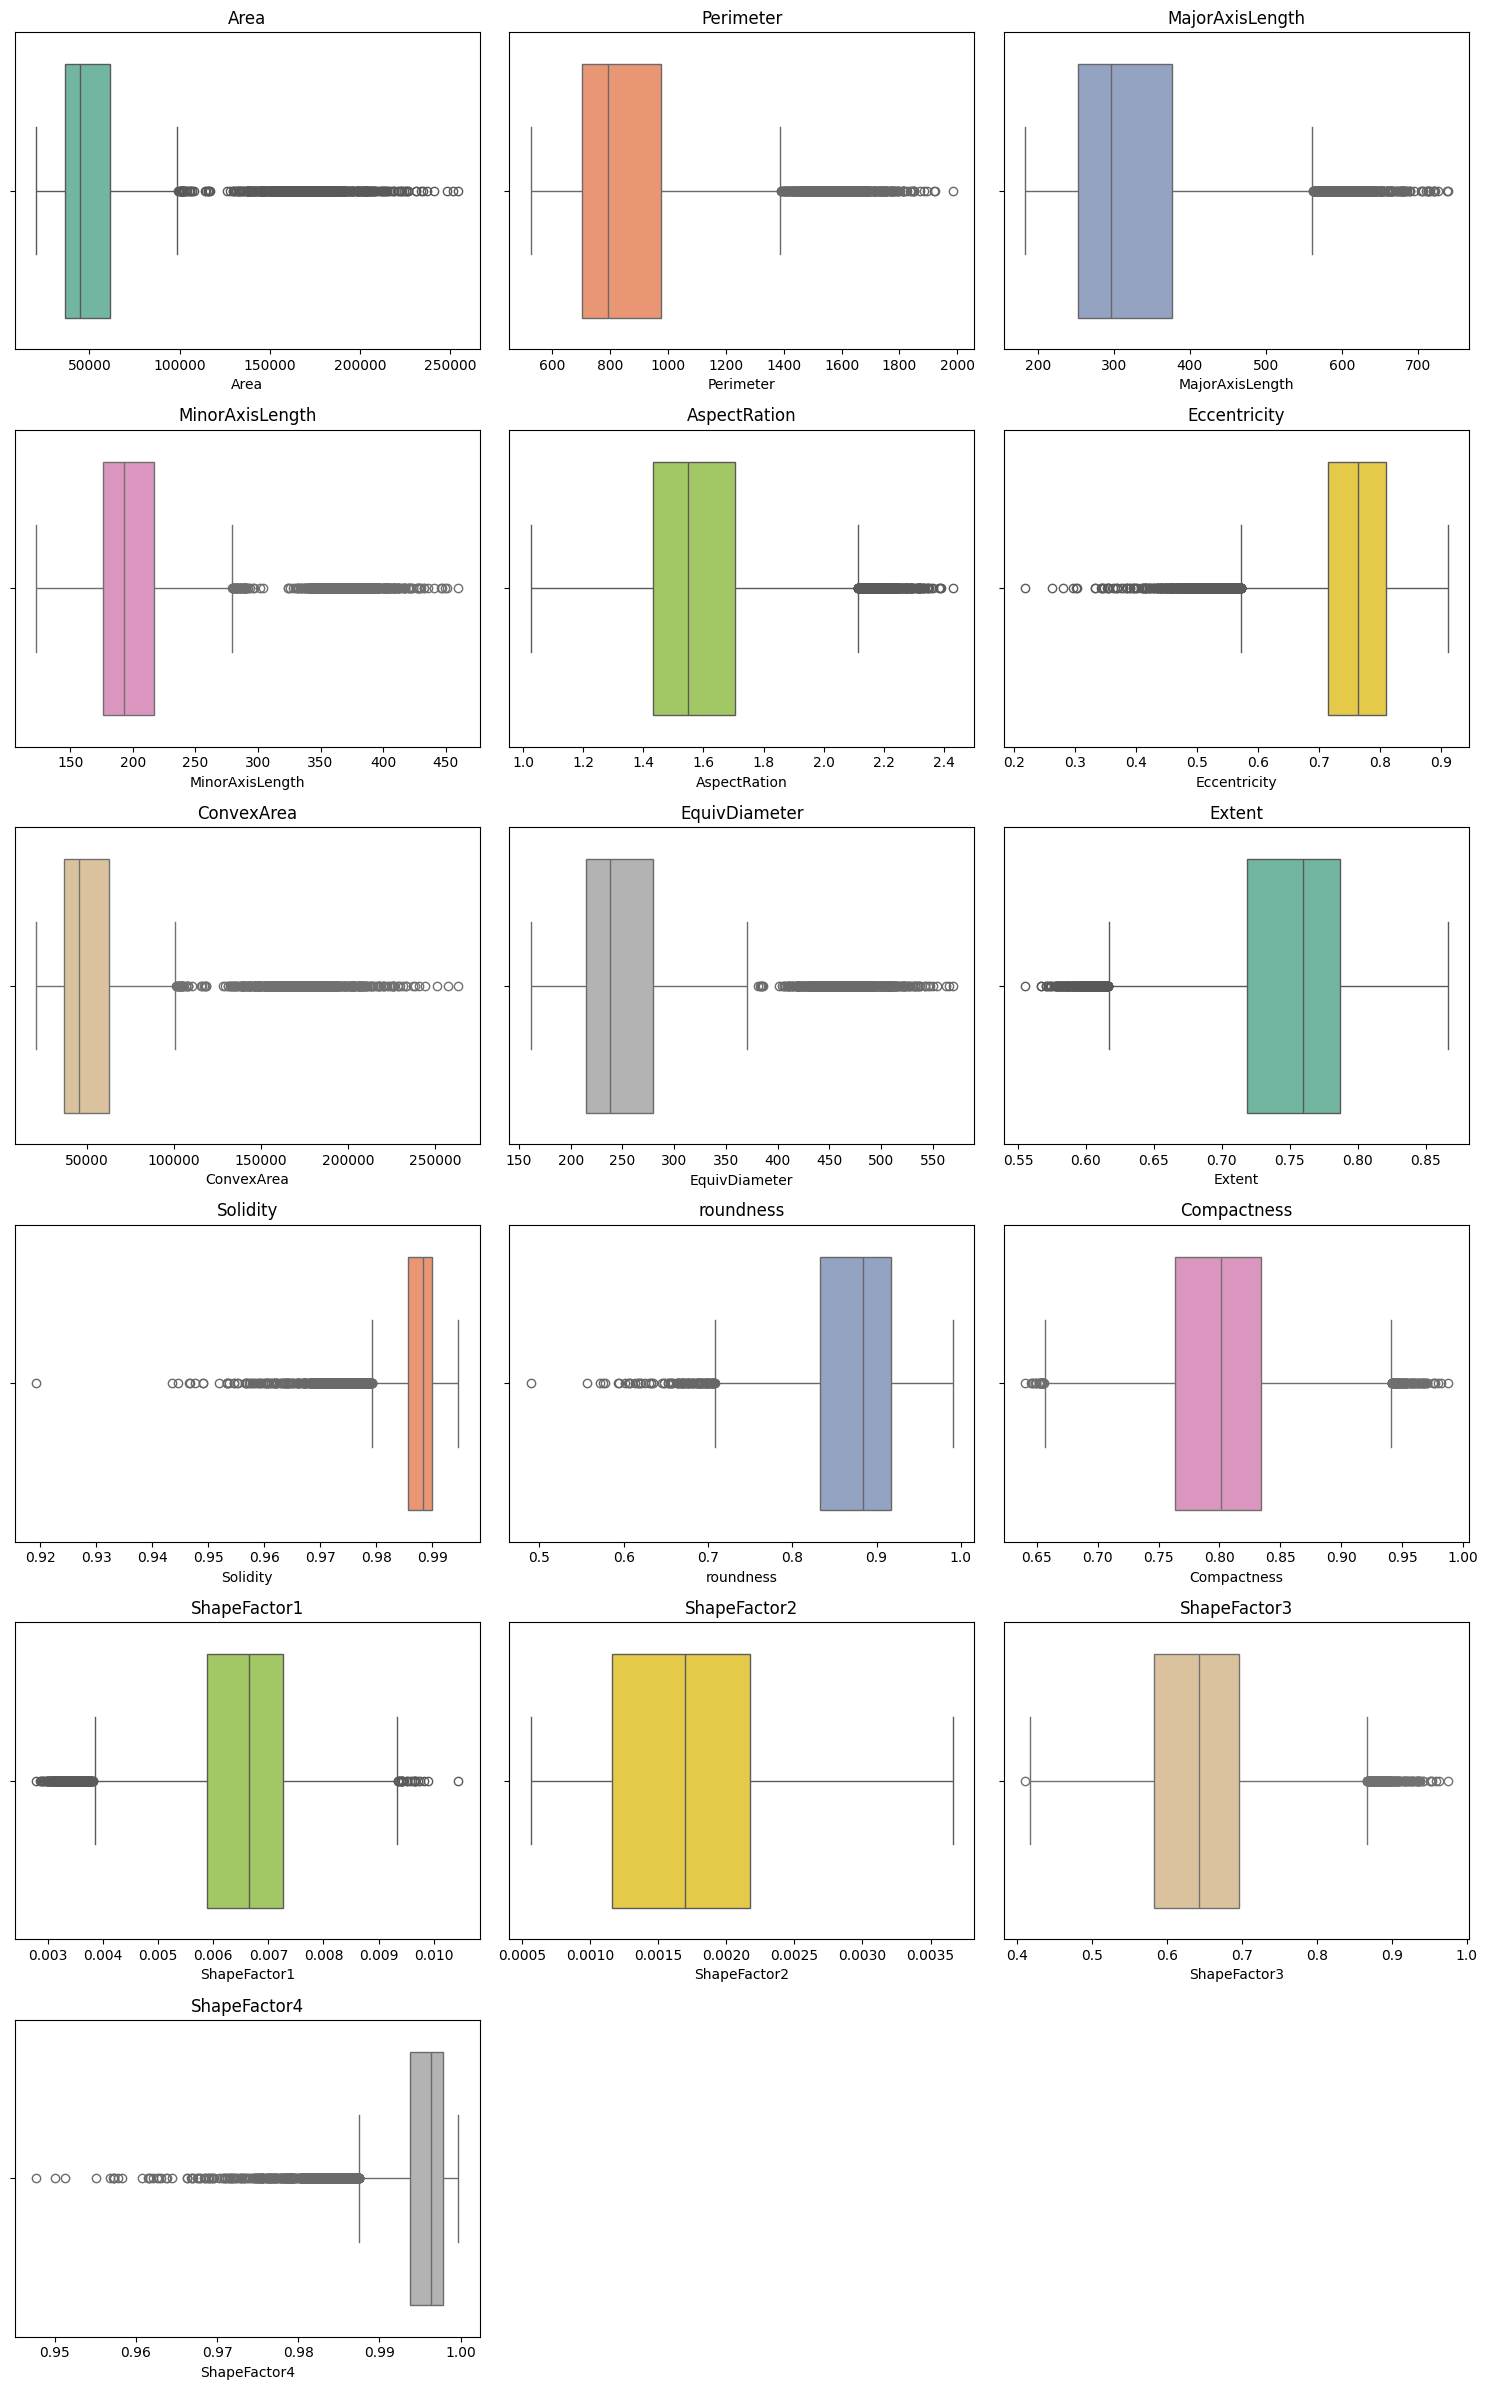

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include="number").columns

# rows & cols
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

# pick a color palette with enough distinct colors
palette = sns.color_palette("Set2", len(num_cols))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color=palette[i])
    axes[i].set_title(col, fontsize=12)

# remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df.shape

(13543, 17)

In [ ]:
plt.figure(figsize = (20,20))
sns.pairplot(df_clean, hue="Class", diag_kind="kde")
plt.show()

from this we cant remoe outlier because they delete the whole bombay class


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score

from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

# Imbalance handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [ ]:
y = df['Class_encoded']
X = df.drop(['Class','Class_encoded'], axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
num_pipeline = Pipeline(steps=[
    ("skewness", PowerTransformer(method="yeo-johnson")),
    ("scaler", StandardScaler())
])

In [ ]:
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, numerical_cols)
    ],
    remainder="drop"
)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", class_weight="balanced", solver="lbfgs", max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight="balanced_subsample", random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(class_weight="balanced", probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(objective="multi:softmax", num_class=len(np.unique(y)), eval_metric="mlogloss", use_label_encoder=False, random_state=42)
}


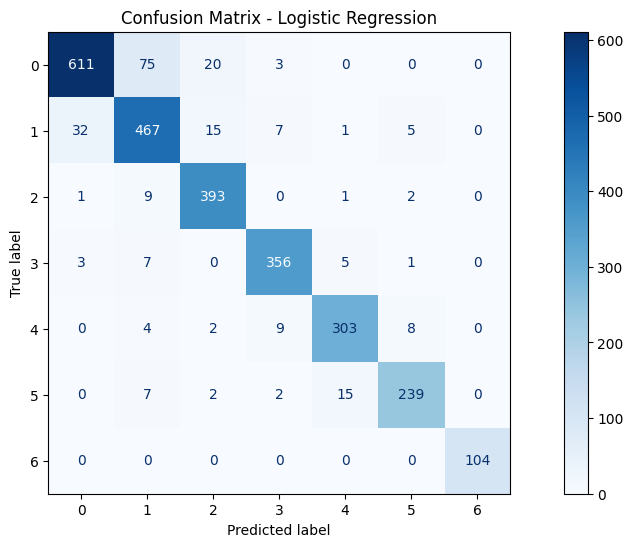

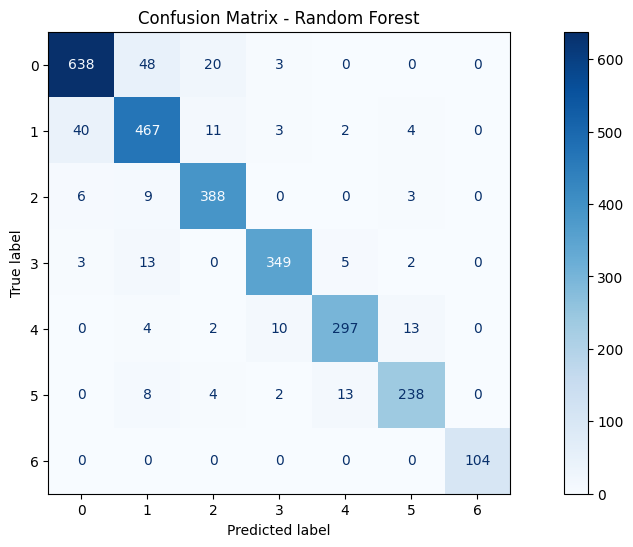

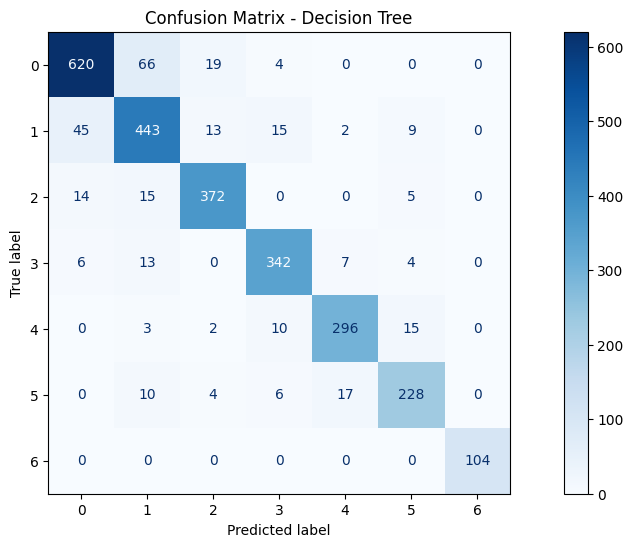

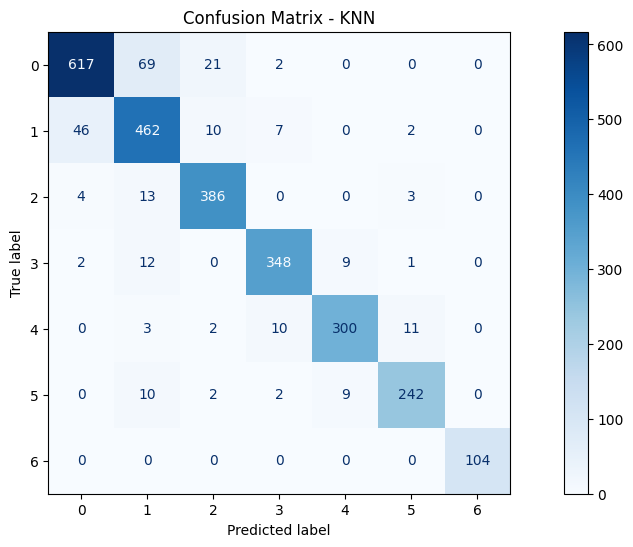

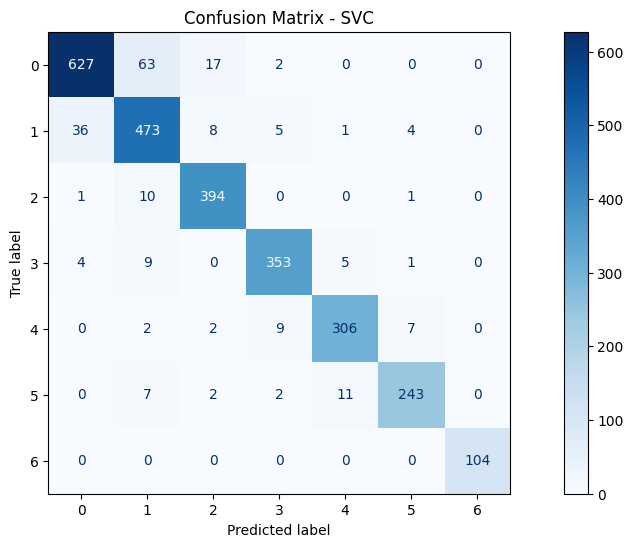

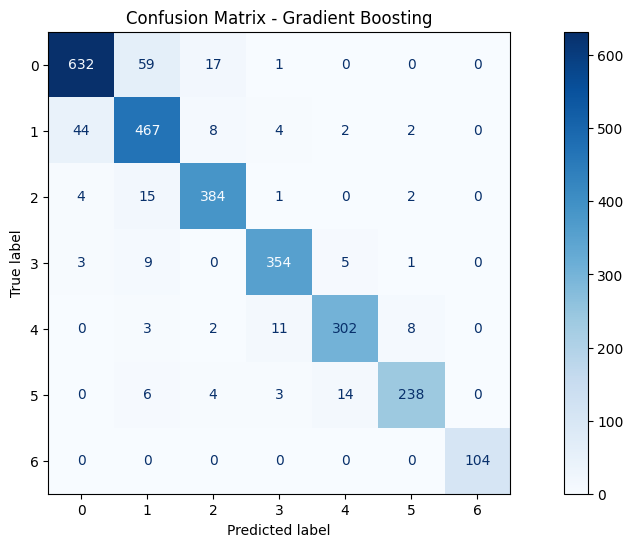

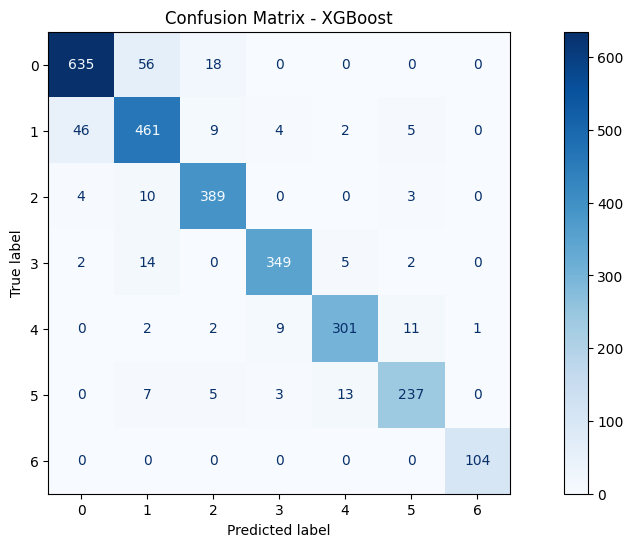

                     F1 (Macro)  F1 (Weighted)
Model                                         
Logistic Regression    0.927432       0.913079
Random Forest          0.927267       0.915991
Decision Tree          0.902524       0.888028
KNN                    0.923810       0.908125
SVC                    0.936332       0.923084
Gradient Boosting      0.929390       0.916109
XGBoost                0.926194       0.914175


In [ ]:
for name, classifier in models.items():
    pipeline = ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", classifier)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.sort(y_test.unique()))

    fig, ax = plt.subplots(figsize=(14,6))
    disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
    ax.set_title(f"Confusion Matrix - {name}")
    plt.show()

    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_weighted = f1_score(y_test, y_pred, average="weighted")

    f1_results.append({
        "Model": name,
        "F1 (Macro)": f1_macro,
        "F1 (Weighted)": f1_weighted
    })

f1_df = pd.DataFrame(f1_results).set_index("Model")
print(f1_df)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__n_estimators": [ 200,300],
    "classifier__max_depth": [3, 5],
    "classifier__learning_rate": [ 0.1, 0.2],
    "classifier__subsample": [0.7, 0.8],
    "classifier__colsample_bytree": [0.7, 0.8]
}

In [ ]:
print("Best Parameters (SVC):", grid_search.best_params_)
print("Best Weighted F1 Score (CV):", grid_search.best_score_)

Best Parameters (SVC): {'classifier__colsample_bytree': 0.7, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.7}
Best Weighted F1 Score (CV): 0.9311829283284242


In [ ]:
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)

pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", xgb)
])


grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="f1_weighted",  # optimize for weighted F1
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('skewness',
                                                                                          PowerTransformer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Area',
                                                                          'Perimeter',
                                                                          'MajorAxisLength',
                                                                          'MinorAxisLength',
                                                                          'AspectRation',
                                                                          'Eccentricity',
                                                                          'ConvexArea',
                                                                          'EquivDiameter',
                                                                          'Extent',
                                                                          'Solidity',
                                                                          'roundness',
                                                                          'Compactness',
                                                                          'ShapeFactor...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=7, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.7, 0.8],
                         'classifier__learning_rate': [0.1, 0.2],
                         'classifier__max_depth': [3, 5],
                         'classifier__n_estimators': [200, 300],
                         'classifier__subsample': [0.7, 0.8]},
             scoring='f1_weighted', verbose=2)

In [ ]:
print("Best Parameters (SVC):", grid_search.best_params_)
print("Best Weighted F1 Score (CV):", grid_search.best_score_)

Best Parameters (SVC): {'classifier__colsample_bytree': 0.7, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.7}
Best Weighted F1 Score (CV): 0.9311829283284242


In [ ]:
y_pred = grid_search.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       709
           1       0.84      0.89      0.86       527
           2       0.93      0.96      0.95       406
           3       0.95      0.95      0.95       372
           4       0.95      0.92      0.93       326
           5       0.94      0.92      0.93       265
           6       1.00      1.00      1.00       104

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



In [ ]:
from sklearn.metrics import f1_score

# Macro F1 (treats all classes equally)
f1_macro = f1_score(y_test, y_pred, average="macro")

# Weighted F1 (accounts for class imbalance)
f1_weighted = f1_score(y_test, y_pred, average="weighted")

print("F1 (Macro):", f1_macro)
print("F1 (Weighted):", f1_weighted)


F1 (Macro): 0.9332284424068644
F1 (Weighted): 0.9197801602898079


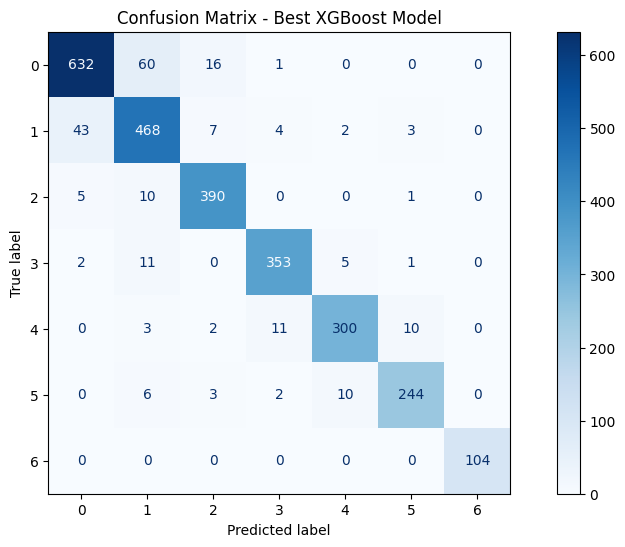

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(12,6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
plt.title("Confusion Matrix - Best XGBoost Model")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC(class_weight="balanced", probability=True, random_state=42)

svc_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", svc)
])

# Define parameter grid
param_grid_svc = {
    "classifier__kernel": ["rbf", "poly"],   # different kernels
    "classifier__C": [ 10,20],                     # regularization strength
    "classifier__gamma": [ "auto"],            # kernel coefficient
    "classifier__degree": [2, 3],                      # only for poly kernel
}


In [ ]:
grid_search_svc = GridSearchCV(
    estimator=svc_pipeline,
    param_grid=param_grid_svc,
    scoring="f1_weighted",  # optimize for weighted F1
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search_svc.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('skewness',
                                                                                          PowerTransformer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Area',
                                                                          'Perimeter',
                                                                          'MajorAxisLength',
                                                                          'MinorAxisLength',
                                                                          'AspectRation',
                                                                          'Eccentricity',
                                                                          'ConvexArea',
                                                                          'EquivDiameter',
                                                                          'Extent',
                                                                          'Solidity',
                                                                          'roundness',
                                                                          'Compactness',
                                                                          'ShapeFactor1',
                                                                          'ShapeFactor2',
                                                                          'ShapeFactor3',
                                                                          'ShapeFactor4'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [10, 20],
                         'classifier__degree': [2, 3],
                         'classifier__gamma': ['auto'],
                         'classifier__kernel': ['rbf', 'poly']},
             scoring='f1_weighted', verbose=2)

In [ ]:
print("Best Parameters (SVC):", grid_search_svc.best_params_)
print("Best Weighted F1 Score (CV):", grid_search_svc.best_score_)


Best Parameters (SVC): {'classifier__C': 10, 'classifier__degree': 2, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best Weighted F1 Score (CV): 0.9296079400866154


In [ ]:
from sklearn.metrics import classification_report, f1_score

y_pred_svc = grid_search_svc.best_estimator_.predict(X_test)

print("\nClassification Report (SVC):\n")
print(classification_report(y_test, y_pred_svc))

f1_macro_svc = f1_score(y_test, y_pred_svc, average="macro")
f1_weighted_svc = f1_score(y_test, y_pred_svc, average="weighted")

print("Test F1 (Macro):", f1_macro_svc)
print("Test F1 (Weighted):", f1_weighted_svc)



Classification Report (SVC):

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       709
           1       0.86      0.88      0.87       527
           2       0.93      0.97      0.95       406
           3       0.94      0.93      0.94       372
           4       0.94      0.94      0.94       326
           5       0.95      0.93      0.94       265
           6       1.00      1.00      1.00       104

    accuracy                           0.92      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.92      0.92      0.92      2709

Test F1 (Macro): 0.9359925124222689
Test F1 (Weighted): 0.9229259977564662


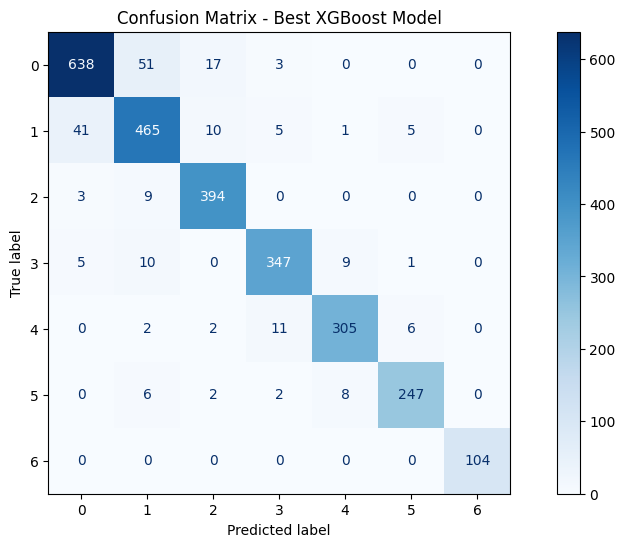

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(12,6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
plt.title("Confusion Matrix - Best XGBoost Model")
plt.show()


In [ ]:
import joblib

# Save the best model from GridSearchCV
best_svc = grid_search_svc.best_estimator_
joblib.dump(best_svc, "svc_best_model.pkl")

print("✅ SVC best model saved as svc_best_model.pkl")


✅ SVC best model saved as svc_best_model.pkl


In [ ]:
df.sample(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_encoded
10378,25862,586.579,211.910051,155.793700,1.360197,0.677863,26116,181.462175,0.783626,0.990274,0.944537,0.856317,0.008194,0.002718,0.733279,0.997403,DERMASON,0
7014,59479,961.314,394.754089,193.256010,2.042648,0.871969,60261,275.192687,0.819496,0.987023,0.808803,0.697124,0.006637,0.000967,0.485982,0.992691,HOROZ,3
1203,40398,724.683,252.234142,204.023122,1.236302,0.587996,40714,226.795792,0.792118,0.992239,0.966660,0.899148,0.006244,0.002517,0.808467,0.999509,SEKER,2
9210,46723,820.510,300.758027,198.322248,1.516512,0.751785,47315,243.904841,0.711092,0.987488,0.872113,0.810967,0.006437,0.001717,0.657668,0.997361,SIRA,1
12227,33454,677.219,237.597280,179.804547,1.321420,0.653691,33847,206.385454,0.777530,0.988389,0.916642,0.868636,0.007102,0.002494,0.754528,0.997048,DERMASON,0
3140,79814,1075.684,380.940448,267.549826,1.423811,0.711841,80880,318.782592,0.789956,0.986820,0.866801,0.836831,0.004773,0.001444,0.700285,0.997074,BARBUNYA,5
16,31202,644.454,215.640695,184.471684,1.168964,0.517871,31573,199.317888,0.779193,0.988249,0.944079,0.924306,0.006911,0.003112,0.854341,0.998693,SEKER,2
10356,25684,599.595,226.927496,144.618937,1.569141,0.770623,26050,180.836624,0.814434,0.985950,0.897752,0.796892,0.008835,0.002198,0.635036,0.996461,DERMASON,0
10055,57239,919.405,356.044818,206.180558,1.726859,0.815266,58301,269.961031,0.696592,0.981784,0.850919,0.758222,0.006220,0.001268,0.574901,0.992773,SIRA,1
2238,59921,1021.206,359.081477,213.150673,1.684637,0.804760,61108,276.213299,0.765275,0.980575,0.722042,0.769222,0.005993,0.001294,0.591702,0.996803,BARBUNYA,5


Streamlit app

https://i2lzqk8wrgbecnzzv99laj.streamlit.app/